<a href="https://colab.research.google.com/github/nimendra-ag/AI_Project_prep/blob/main/6th_semester_project_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix
import opendatasets as od
import os

In [3]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from imblearn.over_sampling import RandomOverSampler

In [4]:
od.download("https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri")

Skipping, found downloaded files in "./brain-tumor-classification-mri" (use force=True to force download)


In [5]:
dataset_path = "brain-tumor-classification-mri/Training"

In [6]:
testset_path = "brain-tumor-classification-mri/Testing"

In [7]:
X_data = []
y_data = []

classes = sorted(os.listdir(dataset_path))

In [8]:
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [9]:
IMAGE_SIZE = 244

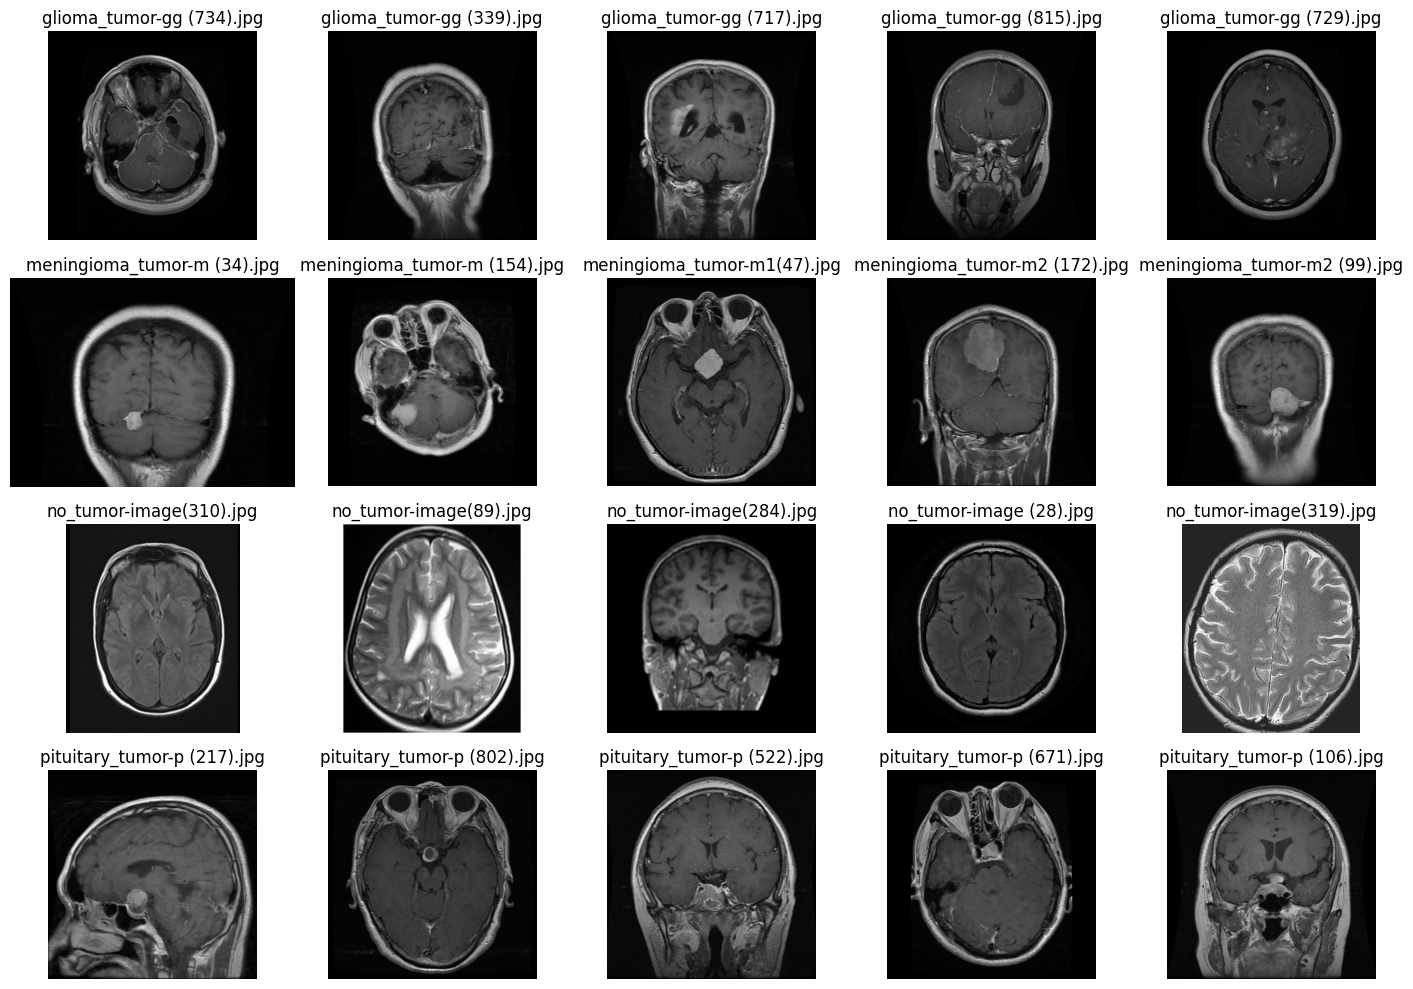

In [10]:
from PIL import Image
base_path = dataset_path
plt.figure(figsize=(15, 10))
image_count = 1

for label in classes:
    label_path = os.path.join(dataset_path, label)
    images = os.listdir(label_path)[:5]  # Get the first 5 images from the class
    # print(images)
    for img_name in images:
        img_path = os.path.join(label_path, img_name)
        img = Image.open(img_path)
        img_array = np.asarray(img)

        plt.subplot(len(classes), 5, image_count)
        plt.imshow(img_array)
        plt.title(f"{label}-{img_name}")
        plt.axis("off")
        plt.tight_layout()
        image_count += 1

plt.tight_layout()
plt.show()


In [11]:
#for the training dataset
for label in classes:
  folder = os.path.join(dataset_path, label)
  for image_name in os.listdir(folder):
    image_path = os.path.join(folder, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    X_data.append(image)
    y_data.append(label)


In [12]:
X_test = []
y_test = []

In [13]:
#for the testing dataset

for label in classes:
  folder = os.path.join(testset_path, label)
  for image_name in os.listdir(folder):
    image_path = os.path.join(folder, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    X_test.append(image)
    y_test.append(label)

In [14]:
X_data[0:5]

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [15]:
X_data = np.array(X_data)
y_data = np.array(y_data)

In [16]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [17]:
print(X_data.shape)
print(X_test.shape)

(2870, 244, 244, 3)
(394, 244, 244, 3)


In [18]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [19]:
print("train:", X_train.shape)
print("val:", X_val.shape)

train: (2296, 244, 244, 3)
val: (574, 244, 244, 3)


In [20]:
X_train = X_train.reshape(2296, 244*244*3)

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)

<Axes: xlabel='count'>

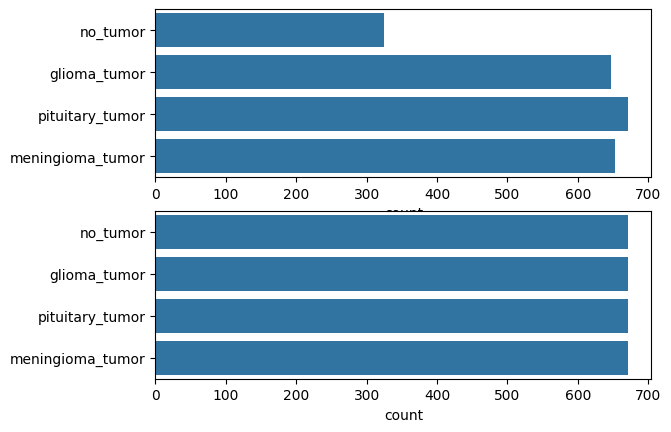

In [22]:
plt.subplot(2,1,1)
sns.countplot(y_train)

plt.subplot(2,1,2)
sns.countplot(y_smote)

In [23]:
X_train = X_smote.reshape(-1, 244, 244, 3)

In [24]:
X_train.shape

(2684, 244, 244, 3)

In [25]:
y_train = y_smote

In [26]:
y_train.shape

(2684,)

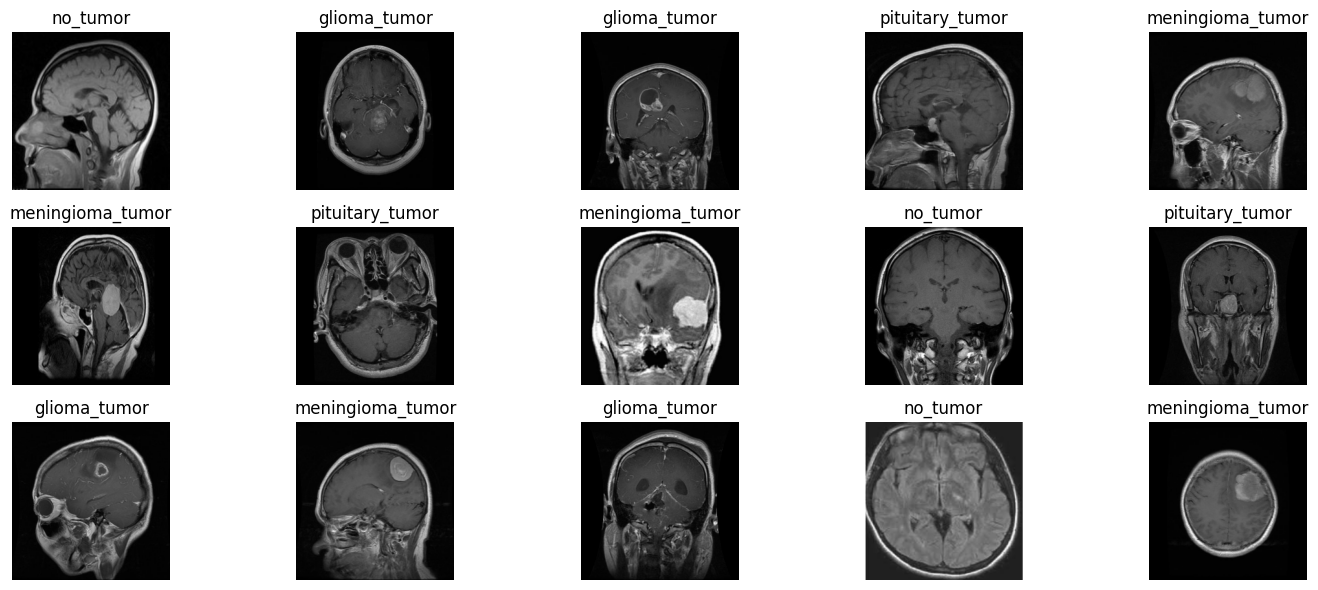

In [27]:
#plot data samples from different categories
plt.figure(figsize=(15, 6))

for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.imshow(X_train[i])
    plt.title(y_train[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [28]:
class_counts = pd.Series(y_train).value_counts()
print("Number of samples in each category:")
print(class_counts)

Number of samples in each category:
no_tumor            671
glioma_tumor        671
pituitary_tumor     671
meningioma_tumor    671
Name: count, dtype: int64


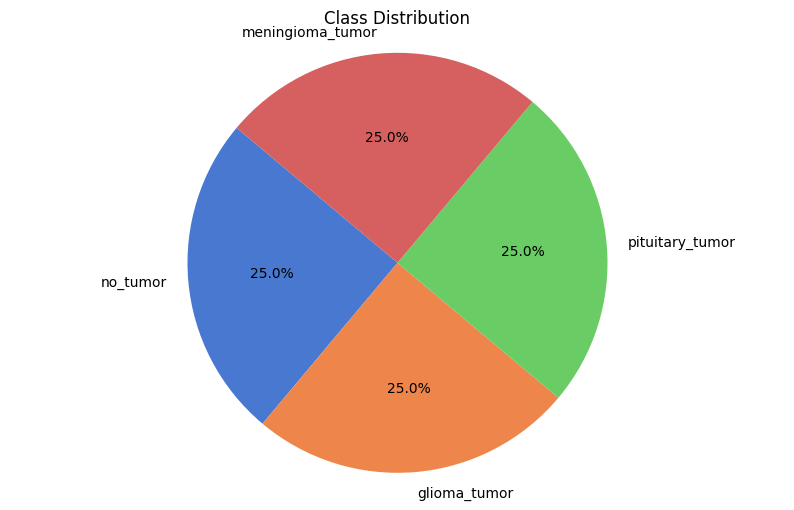

In [29]:
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title("Class Distribution")
plt.axis('equal')
plt.show()

In [30]:
X_train = X_train / 255.0
X_val = X_val / 255.0

In [31]:
y_train

array(['no_tumor', 'no_tumor', 'glioma_tumor', ..., 'no_tumor',
       'no_tumor', 'no_tumor'], dtype='<U16')

In [32]:
classes

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [33]:
y_train_one_hot = [classes.index(label) for label in y_train]
y_train = tf.keras.utils.to_categorical(y_train_one_hot, num_classes=len(classes))

y_val_one_hot = [classes.index(label) for label in y_val]
y_val = tf.keras.utils.to_categorical(y_val_one_hot, num_classes=len(classes))

In [34]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [35]:
y_val

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [36]:
# y_train_labels = np.argmax(y_train, axis=1)
# y_val_labels = np.argmax(y_val, axis=1)

In [37]:
# y_train = y_train_labels
# y_val = y_val_labels

In [38]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(4, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))